# MIT 801 - SL Exam

## Question 3

In [16]:
import numpy as np
import pandas as pd

In [17]:
import statsmodels.api as sm
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [20]:
ModBData = pd.read_excel('ModBData.xlsx')

In [21]:
ModBData.head()

,x1,x2
0,78.648,87.289
1,82.604,86.084
2,87.638,81.156
3,87.168,87.393
4,81.921,86.071


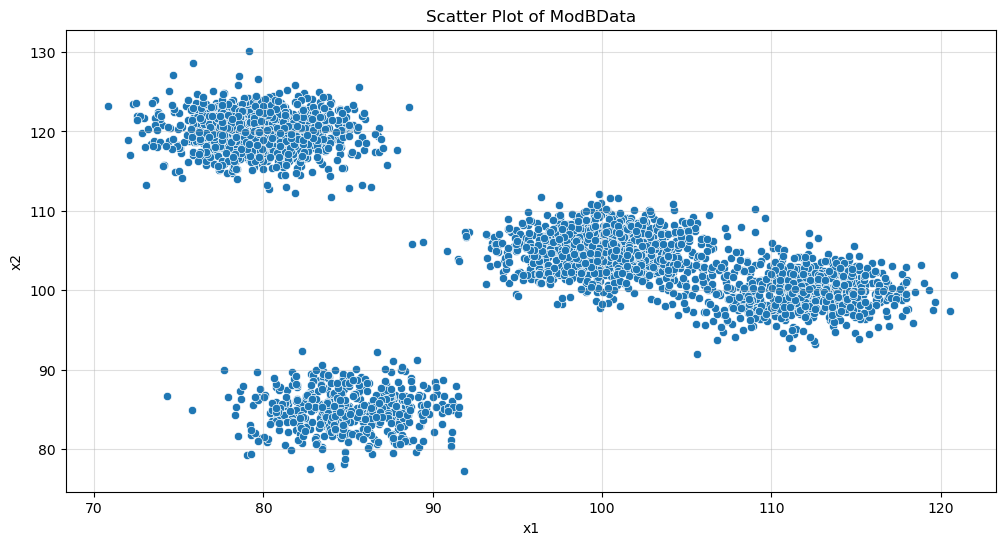

In [22]:
#Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ModBData, x='x1', y='x2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of ModBData')

plt.grid(alpha=0.4) 
plt.show()

In [23]:
from sklearn.mixture import GaussianMixture

#Fit GMMs with 3, 4, and 5 components
n_components = [3, 4, 5]
models = [GaussianMixture(n, random_state=42).fit(ModBData) for n in n_components]

#Calculate BIC for each model
bics = [model.bic(ModBData) for model in models]

#Identify the best model (the one with the lowest BIC)
best_model_index = np.argmin(bics)
best_model = models[best_model_index]
best_n_components = n_components[best_model_index]

print(f"BIC for models with 3, 4, and 5 components: {bics}")
print(f"Best model is with {best_n_components} components (lowest BIC).")

BIC for models with 3, 4, and 5 components: [39220.73372844961, 38484.64943502959, 38536.00961181298]
Best model is with 4 components (lowest BIC).


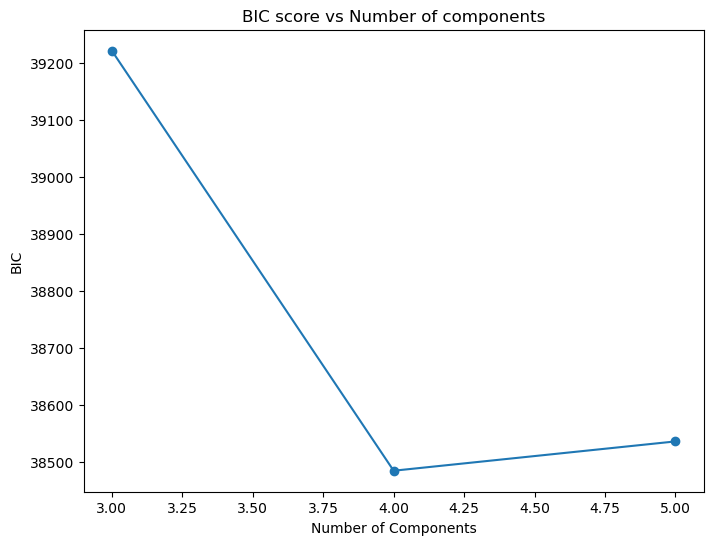

In [24]:
#Plot BICs
plt.figure(figsize=(8, 6))
plt.plot(n_components, bics, marker='o')
plt.title('BIC score vs Number of components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()

In [25]:
#Extract parameters of the best model
weights = best_model.weights_
means = best_model.means_
covariances = best_model.covariances_

print("\nEstimated Parameters for the Best Model:")
print("Weights:", weights)
print("Means:", means)
print("Covariances:", covariances)


Estimated Parameters for the Best Model:
Weights: [0.22635759 0.29032255 0.16129032 0.32202954]
Means: [[111.8058583   99.82104572]
 [ 79.79733602 119.93001293]
 [ 84.97421     84.98866   ]
 [100.05882682 104.9496501 ]]
Covariances: [[[ 9.37293034e+00  2.86800598e-01]
  [ 2.86800598e-01  5.50564235e+00]]

 [[ 8.60080896e+00 -4.73902989e-01]
  [-4.73902989e-01  6.16003153e+00]]

 [[ 9.01915502e+00  2.45372621e-03]
  [ 2.45372621e-03  6.69160383e+00]]

 [[ 9.33662854e+00  6.82992392e-02]
  [ 6.82992392e-02  6.14783383e+00]]]


In [26]:
K = best_model.n_components

print(f"p(x) = ∑_{{k=1}}^{{{K}}} π_k * N(x | μ_k, Σ_k)")
print("\nwhere:")

print("\nMixing Weights (π):")
print(np.array2string(weights, precision=4, separator=', '))

print("\nMeans (μ):")
for i, mean in enumerate(means):
    print(f"  μ_{i+1} = {np.array2string(mean, precision=2, separator=', ')}")

print("\nCovariances (Σ):")
for i, cov in enumerate(covariances):
    print(f"  Σ_{i+1} = ")
    print(np.array2string(cov, precision=2, separator=', '))

p(x) = ∑_{k=1}^{4} π_k * N(x | μ_k, Σ_k)

where:

Mixing Weights (π):
[0.2264, 0.2903, 0.1613, 0.322 ]

Means (μ):
  μ_1 = [111.81,  99.82]
  μ_2 = [ 79.8 , 119.93]
  μ_3 = [84.97, 84.99]
  μ_4 = [100.06, 104.95]

Covariances (Σ):
  Σ_1 = 
[[9.37, 0.29],
 [0.29, 5.51]]
  Σ_2 = 
[[ 8.6 , -0.47],
 [-0.47,  6.16]]
  Σ_3 = 
[[9.02e+00, 2.45e-03],
 [2.45e-03, 6.69e+00]]
  Σ_4 = 
[[9.34, 0.07],
 [0.07, 6.15]]


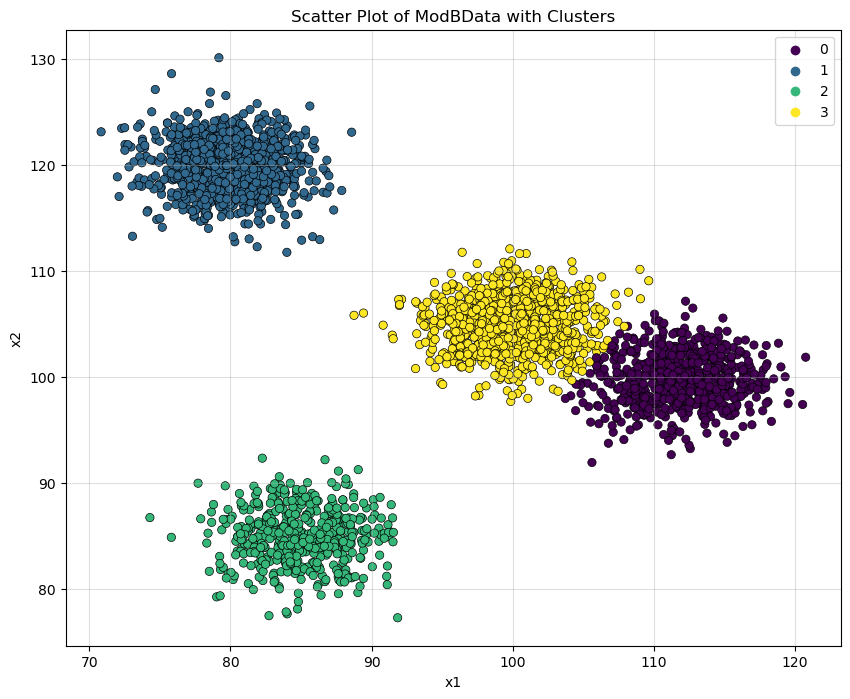

In [27]:
#Predict the cluster for each data point
cluster_labels = best_model.predict(ModBData)

#Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=ModBData, x='x1', y='x2', hue = cluster_labels,  palette='viridis', marker='o', edgecolor='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of ModBData with Clusters')

plt.grid(alpha=0.4) 
plt.show()

In [28]:
data_point = np.array([[83.5, 93.8]])

#Calculate posterior probabilities
responsibilities = best_model.predict_proba(data_point)

print(f"Responsibilities for the data point {data_point}: {responsibilities}")

#Classify to highest posterior probability
assigned_cluster = np.argmax(responsibilities)

print(f"The data point {data_point} is classified to cluster {assigned_cluster}.")

Responsibilities for the data point [[83.5 93.8]]: [[1.38523295e-17 5.19141780e-22 9.99999984e-01 1.62084088e-08]]
The data point [[83.5 93.8]] is classified to cluster 2.


C:\Users\ThokozileKhosa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


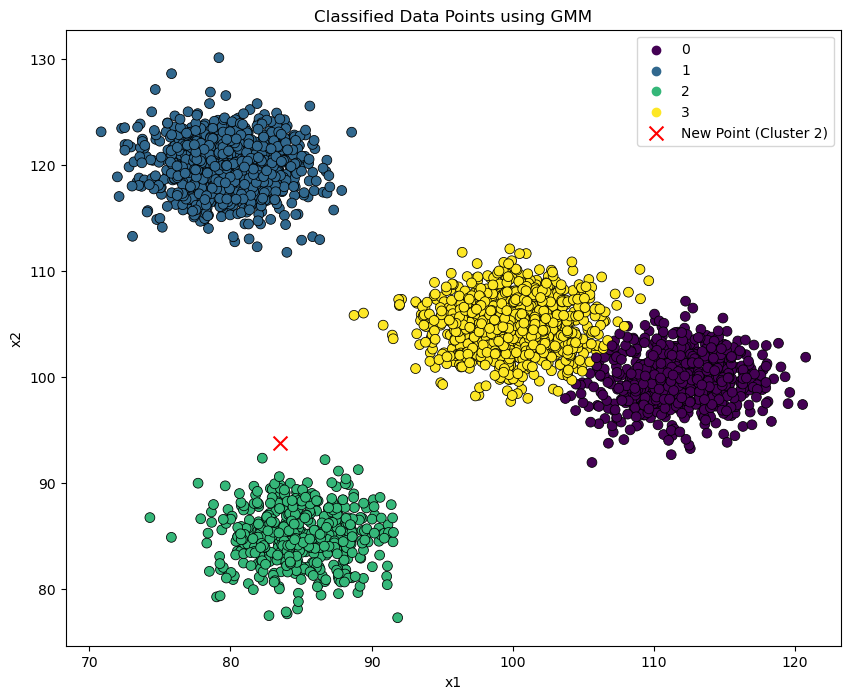

In [29]:
plt.figure(figsize=(10, 8))

# Plot classified points
sns.scatterplot(data=ModBData, x='x1', y='x2', hue=cluster_labels, palette='viridis', edgecolor='k', s=50)

# Highlight the new data point
plt.scatter(data_point[0][0], data_point[0][1], c='red', marker='x', s=100, label=f'New Point (Cluster {assigned_cluster})')

plt.title('Classified Data Points using GMM')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()